Classification of iris flowers using XGBRegressor and DecisionTreeRegressor

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score , confusion_matrix

import seaborn as sns

df = pd.read_csv("IRIS.csv" )

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data Preprocessing

In [46]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [48]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [49]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Data Visualisation

In [50]:
def ScatterPlot(column1,column2, df = df):
    plt.figure(figsize=(10, 4))
    species1 = df[df['species'] == 'Iris-setosa' ]
    species2 = df[df['species'] == 'Iris-versicolor' ]
    species3 = df[df['species'] == 'Iris-virginica' ]
    
    plt.scatter(species1[column1],species1[column2],color='green')
    plt.scatter(species2[column1],species2[column2],color='red')
    plt.scatter(species3[column1],species3[column2],color='blue')
    plt.xlabel(f'{column1}')
    plt.ylabel(f'{column2}')
    plt.title(f"{column1} Vs. {column2}")


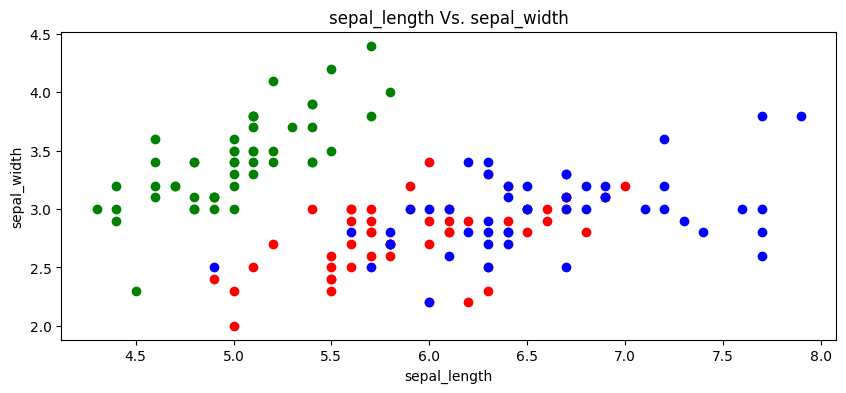

In [51]:
ScatterPlot('sepal_length','sepal_width')

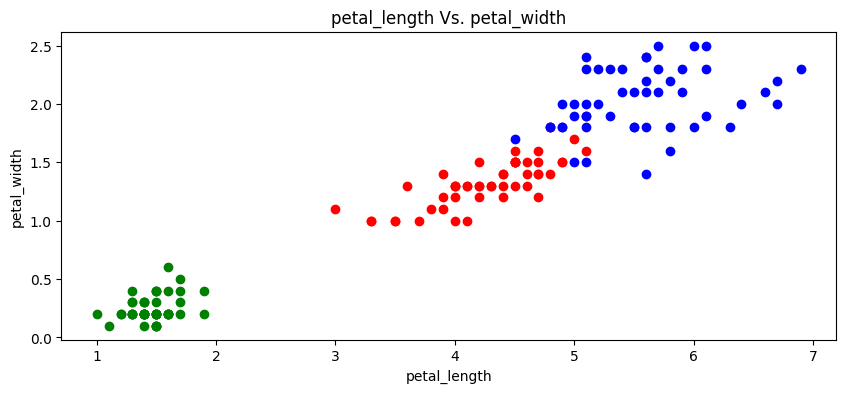

In [52]:
ScatterPlot('petal_length','petal_width')

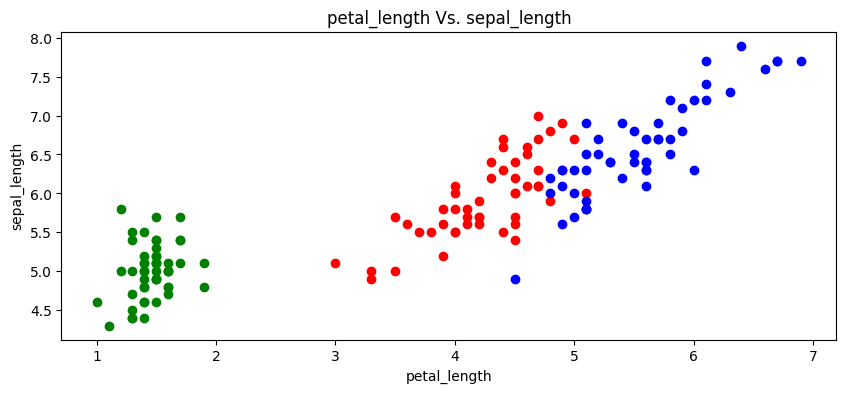

In [53]:
ScatterPlot('petal_length','sepal_length')

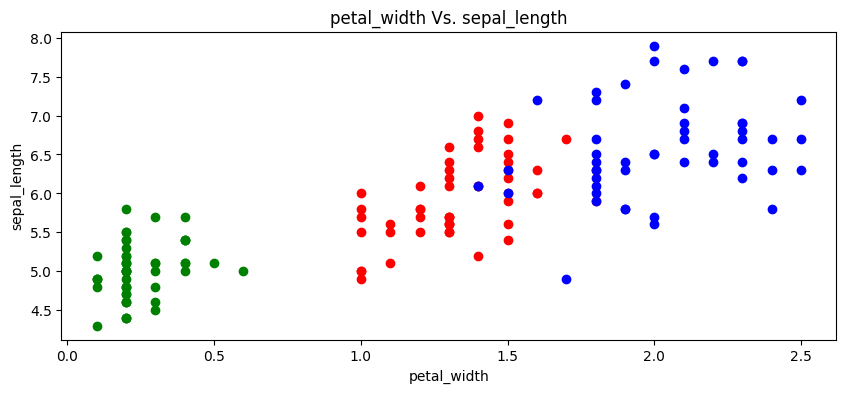

In [54]:
ScatterPlot('petal_width','sepal_length')

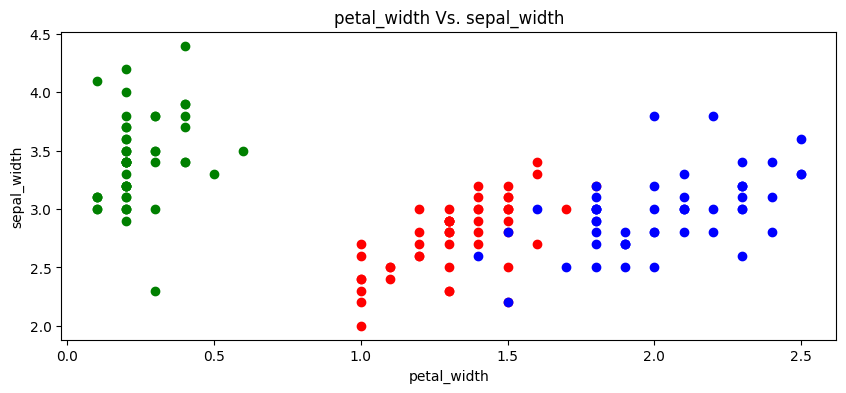

In [55]:
ScatterPlot('petal_width','sepal_width')

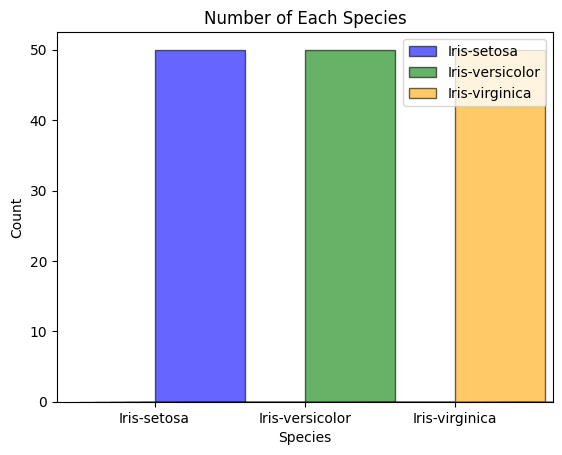

In [56]:
# Get unique species and their counts
species_counts = df['species'].value_counts().index
# Define colors for each species
colors = {species_counts[0]: 'blue', species_counts[1]: 'green', species_counts[2]: 'orange'}

# Plot separate histograms for each species
for species, color in colors.items():
    plt.hist(df[df['species'] == species]['species'],
            color=color, alpha=0.6, label=species, edgecolor='black',  width=0.6 , align='mid')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Each Species')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [57]:
def Histogram(column) :
    # Get unique species values
    unique_species = df['species'].unique()

    # Define colors for each species
    colors = sns.color_palette("Set2", n_colors=len(unique_species))

    # Plot histogram for each species with different colors
    for i, species in enumerate(unique_species):
        species_data = df[df['species'] == species][column]
        plt.hist(species_data, color=colors[i], alpha=0.6, label=species, edgecolor='black', width=0.4)

    # Add labels and title
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()


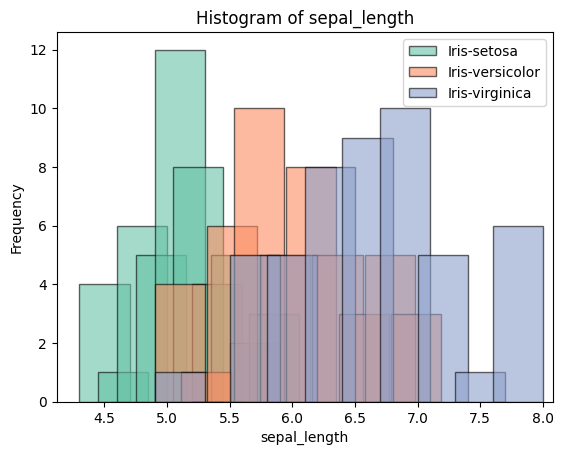

In [58]:
Histogram('sepal_length')

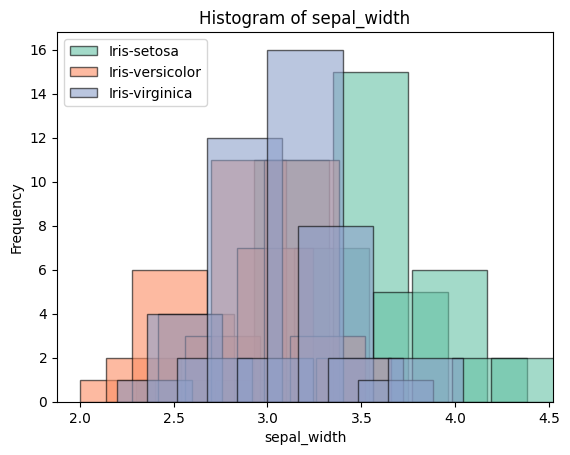

In [59]:
Histogram('sepal_width')

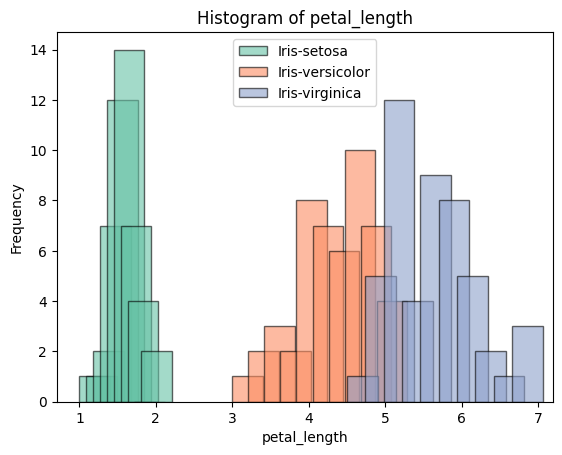

In [60]:
Histogram('petal_length')

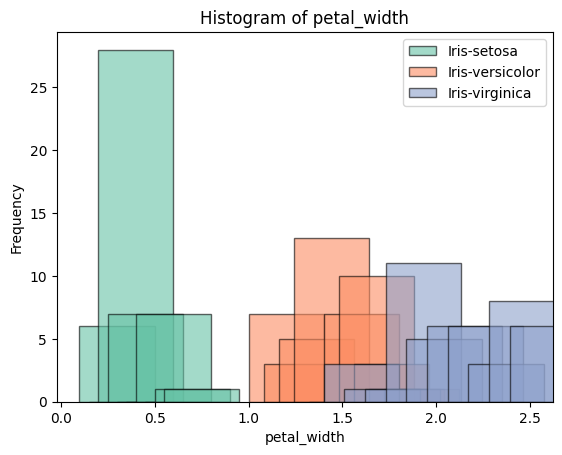

In [61]:
Histogram('petal_width')

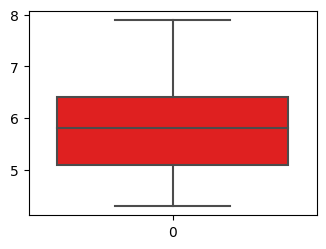

In [62]:
plt.subplot(2,2,1)
sns.boxplot(df['sepal_length'],color='red')

plt.tight_layout()
plt.show()

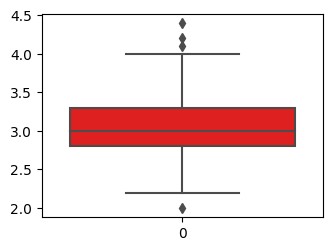

In [63]:
plt.subplot(2,2,2)
sns.boxplot(df['sepal_width'],color='red')

plt.tight_layout()
plt.show()

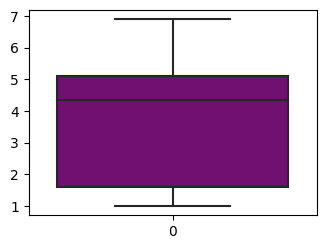

In [64]:
plt.subplot(2,2,3)
sns.boxplot(df['petal_length'],color='purple')

plt.tight_layout()
plt.show()

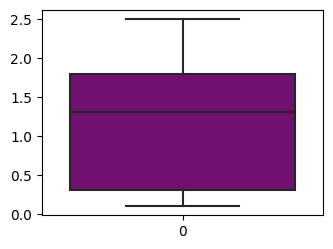

In [65]:
plt.subplot(2,2,4)
sns.boxplot(df['petal_width'],color='purple')

plt.tight_layout()
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


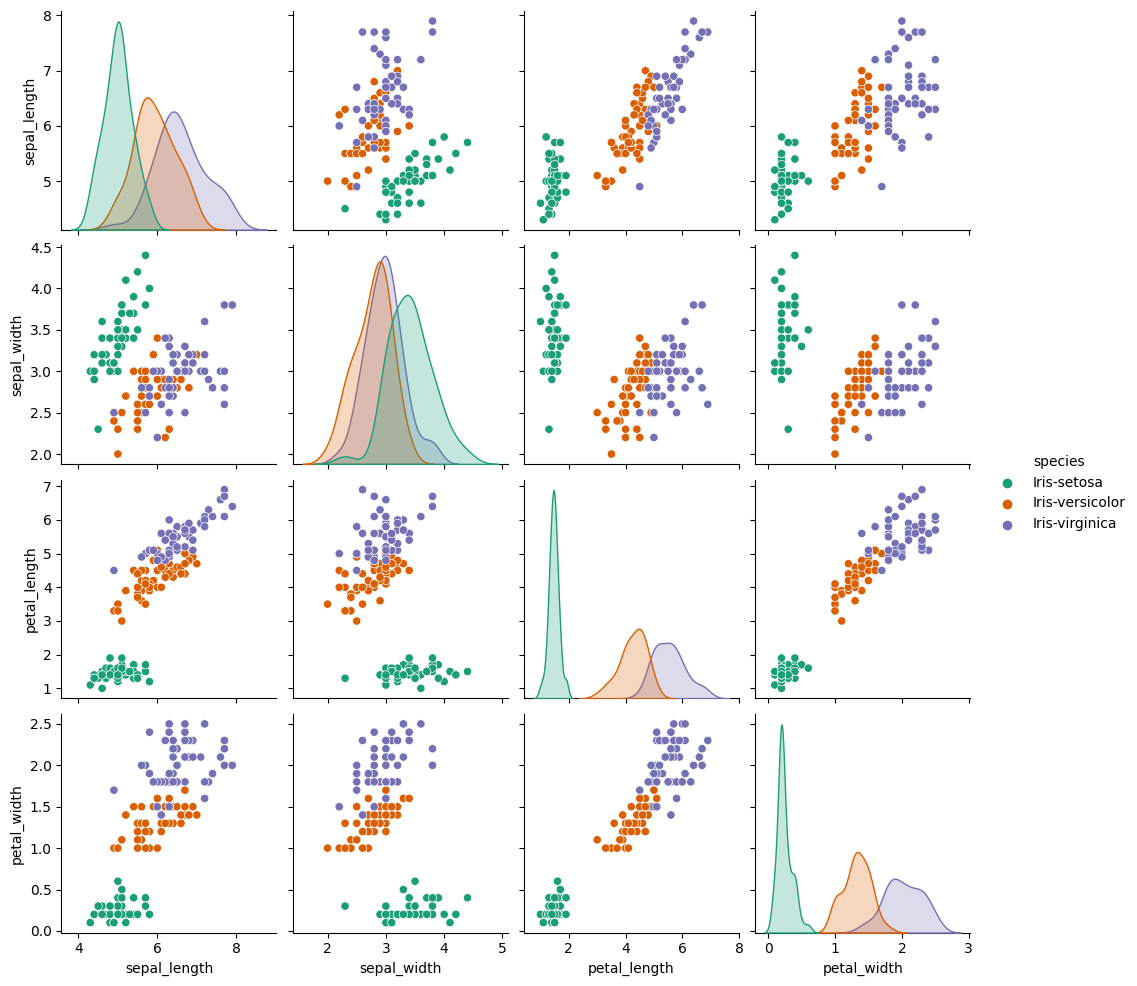

In [66]:
sns.pairplot(df,hue='species',palette='Dark2')

Refinement

In [67]:
species_encoding = df.groupby('species').agg({'sepal_length': 'mean'}).to_dict()
df['species'] = round(df['species'].map(species_encoding['sepal_length']), 1)
df.species.unique()

array([5. , 5.9, 6.6])

<Axes: >

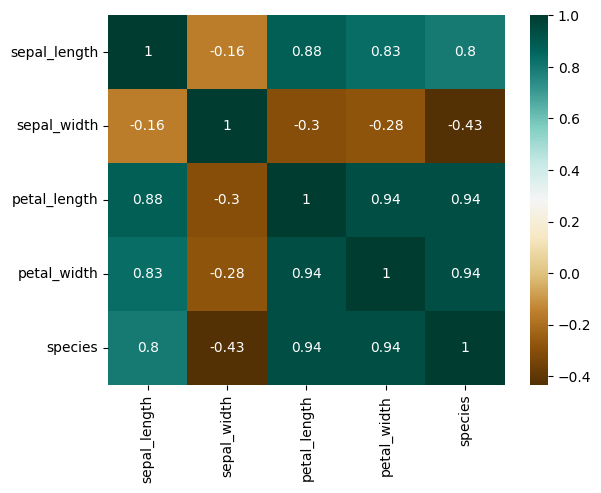

In [68]:
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="BrBG")

In [69]:
# Splitting Independent and Dependent Variable
target = df['species']
df.drop('species' , axis=1, inplace=True)

In [70]:
scaler=MinMaxScaler()
for column in df.columns :
    scaler.fit(df[[column]])
    df[column]=scaler.transform(df[[column]])


Model Architecture 

In [71]:
# Splitting train and test set
X_train , X_test ,y_train ,  y_test = train_test_split(df,target,test_size=.3,random_state= 21)


XGBRegressor

In [72]:
# Create and train the XGBoost Regressor model
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgboost_train = xgboost.predict(X_train)
y_pred_xgboost_test = xgboost.predict(X_test)

Metrics

In [73]:
print('Mean Squared Error (xgboost - Test):', mean_squared_error(y_test, y_pred_xgboost_test))
print('Mean Absolute Error  (xgboost - Test): ',mean_absolute_error(y_test, y_pred_xgboost_test))
print('R2 score (xgboost - Train): ', r2_score(y_train, y_pred_xgboost_train))
print('R2 Score (xgboost - Test):', r2_score(y_test,y_pred_xgboost_test))

Mean Squared Error (xgboost - Test): 0.038724397197316414
Mean Absolute Error  (xgboost - Test):  0.07400820838080505
R2 score (xgboost - Train):  0.9999996470224635
R2 Score (xgboost - Test): 0.9062716289867019


DecisionTreeRegressor

In [74]:
#Decision Tree Regressor 
dt = DecisionTreeRegressor(max_depth=10,random_state=0)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [75]:
print('Mean Squared Error (Decision Tree - Test):',mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error  (Decision Tree - Test): ',mean_absolute_error(y_test, y_pred_test))
print('R2 score (Decision Tree - Train): ',r2_score(y_train,y_pred_dt))
print('R2 Score (Decision Tree - Test):',r2_score(y_test,y_pred_test))

Mean Squared Error (Decision Tree - Test): 0.03266666666666638
Mean Absolute Error  (Decision Tree - Test):  0.0466666666666681
R2 score (Decision Tree - Train):  1.0
R2 Score (Decision Tree - Test): 0.9209337349397597


Model Evaluation for XGBRegressor

36    -0.000109
37    -0.000109
13    -0.000109
68    -0.000066
11    -0.000109
         ...   
120   -0.000049
112   -0.000049
48    -0.000109
4     -0.000109
56     0.000283
Name: species, Length: 105, dtype: float64


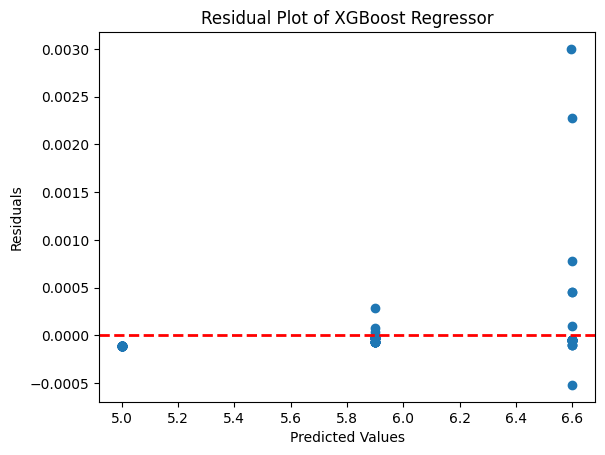

In [76]:
# Calculate residuals
residuals = y_train - y_pred_xgboost_train
print(residuals)
# Plot residuals against predicted values
plt.scatter(y_pred_xgboost_train, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of XGBoost Regressor')
plt.show()

<Axes: xlabel='species', ylabel='Density'>

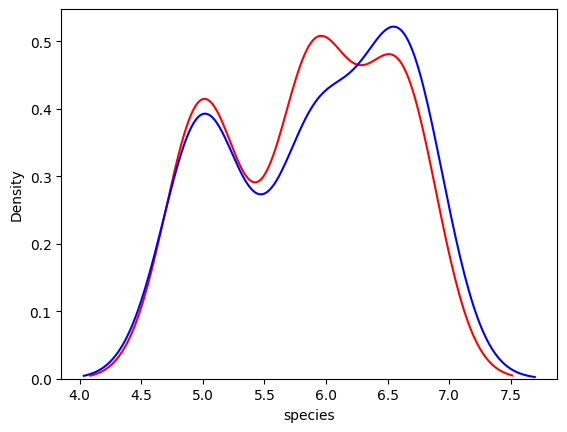

In [77]:
ax1 = sns.kdeplot(y_test, color='r',label='Actual value')
sns.kdeplot(y_pred_xgboost_test , color='b',label='Predicted value' , ax=ax1)

Model Evaluation for DecisionTreeRegressor

36     0.000000e+00
37     0.000000e+00
13     0.000000e+00
68    -2.664535e-15
11     0.000000e+00
           ...     
120    3.552714e-15
112    3.552714e-15
48     0.000000e+00
4      0.000000e+00
56    -2.664535e-15
Name: species, Length: 105, dtype: float64


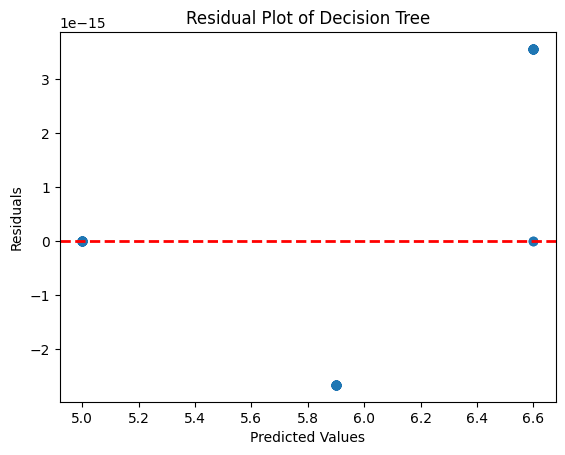

In [78]:
# Calculate residuals
residuals = y_train - y_pred_dt
print(residuals)
# Plot residuals against predicted values
plt.scatter(y_pred_dt, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Decision Tree')
plt.show()

<Axes: xlabel='species', ylabel='Density'>

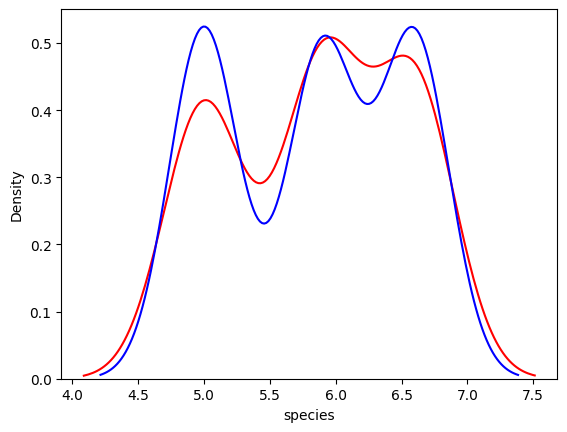

In [79]:
ax1 = sns.kdeplot(y_test, color='r',label='Actual value')
sns.kdeplot(y_pred_dt , color='b',label='Predicted value' , ax=ax1)